In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset_name = '13129_0.5_0.003'

cplex_dataset_name = 'c_' + dataset_name
tabusearch_dataset_name = 'h_' + dataset_name

cplex_timeslot_csv = '../runs/' + cplex_dataset_name + '/timeslot_data.csv'
cplex_sfc_csv = '../runs/' + cplex_dataset_name + '/sfc_data.csv'
tabusearch_timeslot_csv = '../runs/' + tabusearch_dataset_name + '/timeslot_data.csv'
tabusearch_sfc_csv = '../runs/' + tabusearch_dataset_name + '/sfc_data.csv'

In [54]:
ts_ts_df = pd.read_csv(tabusearch_timeslot_csv)
cx_ts_df = pd.read_csv(cplex_timeslot_csv)

In [67]:
ts_ts_df.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.000,100.0,0,13.0,13.0,16.000000,20.00,20.0
1,1,39.081,32.308,29.385,100.0,0,14.0,14.0,15.875000,18.65,19.0
2,2,52.053,41.957,26.764,100.0,0,13.0,13.7,16.500000,19.65,20.0
3,3,67.134,56.194,25.613,100.0,0,15.0,15.0,17.733333,20.00,20.0
4,4,113.349,95.657,23.904,100.0,0,14.0,14.0,16.636364,19.50,20.0


In [55]:
cx_ts_df.head()

,timeslot,carbon_footprint,brown_energy,green_energy,acceptance_ratio,migration_count,ps_min,ps_5th,ps_mean,ps_95th,ps_max
0,0,0.000,0.000,0.000,100.0,0,13.0,13.0,17.142857,22.35,23.0
1,1,31.494,26.889,47.410,100.0,0,14.0,14.0,16.250000,19.00,19.0
2,2,34.974,29.715,52.853,100.0,0,15.0,15.0,18.125000,21.65,22.0
3,3,44.470,38.840,53.546,100.0,0,16.0,16.7,19.733333,21.90,24.0
4,4,68.110,60.433,67.956,100.0,0,14.0,14.5,18.181818,22.50,23.0


In [61]:
cf_df = ts_ts_df[['timeslot', 'carbon_footprint']]
cf_df.columns = ['Timeslot', 'Tabu Search']
cf_df.loc[:,'Optimal'] = cx_ts_df['carbon_footprint']
cf_df.loc[:,'baseline'] = cx_ts_df['carbon_footprint']

In [62]:
cf_df.head()

,Timeslot,Tabu Search,Optimal,baseline
0,0,0.000,0.000,0.000
1,1,39.081,31.494,31.494
2,2,52.053,34.974,34.974
3,3,67.134,44.470,44.470
4,4,113.349,68.110,68.110


In [63]:
ts_melt = cf_df.melt(id_vars='Timeslot', var_name="Optimizer", value_name="Carbon Footprint")
ts_melt.head()

,Timeslot,Optimizer,Carbon Footprint
0,0,Tabu Search,0.000
1,1,Tabu Search,39.081
2,2,Tabu Search,52.053
3,3,Tabu Search,67.134
4,4,Tabu Search,113.349


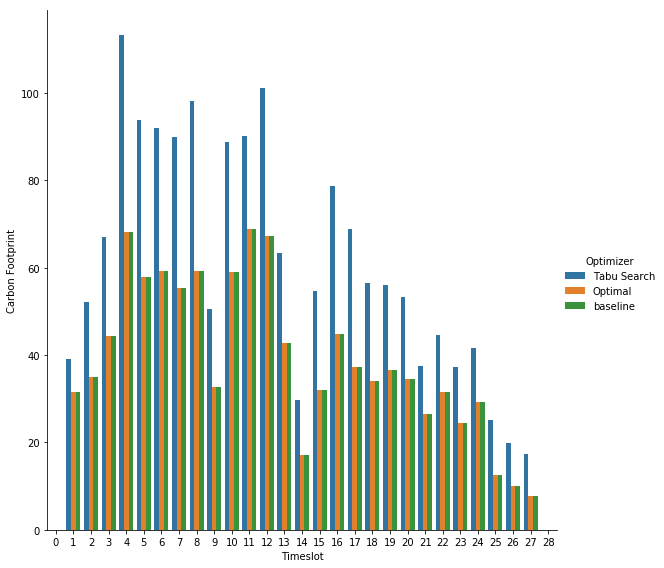

In [64]:
sns.catplot(x="Timeslot", y="Carbon Footprint", hue="Optimizer", data=ts_melt, height=8, kind="bar")